In [9]:
import pandas as pd

human_corrected_csv_path = "human_corrected_apa4_dwa5_XUVG.csv"
df = pd.read_csv(human_corrected_csv_path, comment="#")
# drop rows where the tension is < 0
df = df[df["tension"] > 0]
# drop "confidence", "submitted", "algo_ver"
df = df.drop(["confidence", "submitted", "algo_ver"], axis=1)
df

,stage,scan_id,datetime,side,layer,headboard_num,apa_channel,dwa_channel,segment,tension
0,DWA Development,20230307T111813_G_A_1_2-4-6-8-10-12-14-16_T,2023-03-07 11:18:13,A,G,1,16,0,16,6.743728
1,DWA Development,20230307T111813_G_A_1_2-4-6-8-10-12-14-16_T,2023-03-07 11:18:13,A,G,1,14,1,14,6.559435
2,DWA Development,20230307T111813_G_A_1_2-4-6-8-10-12-14-16_T,2023-03-07 11:18:13,A,G,1,12,2,12,6.661868
3,DWA Development,20230307T111813_G_A_1_2-4-6-8-10-12-14-16_T,2023-03-07 11:18:13,A,G,1,10,3,10,6.438527
4,DWA Development,20230307T111813_G_A_1_2-4-6-8-10-12-14-16_T,2023-03-07 11:18:13,A,G,1,8,4,8,6.398474
...,...,...,...,...,...,...,...,...,...,...
4073,Winding,20230208T185357_U_A_10_34-36-38-40-434-436-438...,2023-02-08 18:53:57,A,U,10,38,2,438,6.392809
4074,Winding,20230208T185357_U_A_10_34-36-38-40-434-436-438...,2023-02-08 18:53:57,A,U,10,38,2,838,7.953737
4075,Winding,20230208T185357_U_A_10_34-36-38-40-434-436-438...,2023-02-08 18:53:57,A,U,10,40,3,40,6.489331
4076,Winding,20230208T185357_U_A_10_34-36-38-40-434-436-438...,2023-02-08 18:53:57,A,U,10,40,3,440,6.020878


In [34]:
import pandas as pd

# group the dataframe by scan_id and apa_channel
grouped = df.groupby(['scan_id', 'apa_channel'])

# initialize lists for the new dataframe columns
scan_ids = []
apa_channels = []
sides = []
layers = []
headboard_nums = []
dwa_channels = []
tension_1 = []
tension_2 = []
tension_3 = []

# iterate over each group
for name, group in grouped:
    # extract the scan_id and apa_channel
    scan_id, apa_channel = name
    
    # append the scan_id and apa_channel to their respective lists
    scan_ids.append(scan_id)
    apa_channels.append(apa_channel)
    
    layers.append(group['layer'].iloc[0])
    sides.append(group['side'].iloc[0])
    headboard_nums.append(group['headboard_num'].iloc[0])
    dwa_channels.append(group['dwa_channel'].iloc[0])

    # sort the group by segment_num and extract the tension values
    tensions = group.sort_values('segment')['tension'].tolist()
    
    # append the tension values to their respective lists
    if len(tensions) >= 1:
        tension_1.append(tensions[0])
    else:
        tension_1.append(None)
    
    if len(tensions) >= 2:
        tension_2.append(tensions[1])
    else:
        tension_2.append(None)
    
    if len(tensions) >= 3:
        tension_3.append(tensions[2])
    else:
        tension_3.append(None)

    
# create the new dataframe
new_df = pd.DataFrame({
    'scan_id': scan_ids,
    'side': sides,
    'layer': layers,
    'headboard_num': headboard_nums,
    'dwa_channel': dwa_channels,
    'apa_channel': apa_channels,
    'tension_1': tension_1,
    'tension_2': tension_2,
    'tension_3': tension_3
})
new_df[new_df["layer"] == "U"]

,scan_id,side,layer,headboard_num,dwa_channel,apa_channel,tension_1,tension_2,tension_3
48,20230208T130355_U_B_10_1-3-5-7-9-11-13-15-401-...,B,U,10,0,1,6.575301,6.107858,NaN
49,20230208T130355_U_B_10_1-3-5-7-9-11-13-15-401-...,B,U,10,1,3,6.513402,6.266677,NaN
50,20230208T130355_U_B_10_1-3-5-7-9-11-13-15-401-...,B,U,10,2,5,6.555607,6.245330,NaN
51,20230208T130355_U_B_10_1-3-5-7-9-11-13-15-401-...,B,U,10,3,7,6.744702,6.837454,NaN
52,20230208T130355_U_B_10_1-3-5-7-9-11-13-15-401-...,B,U,10,4,9,6.282411,6.554827,NaN
...,...,...,...,...,...,...,...,...,...
1727,20230208T185245_U_A_10_33-35-37-39-433-435-437...,A,U,10,3,39,5.458350,6.331240,6.704862
1728,20230208T185357_U_A_10_34-36-38-40-434-436-438...,A,U,10,0,34,5.796932,6.445631,7.774217
1729,20230208T185357_U_A_10_34-36-38-40-434-436-438...,A,U,10,1,36,5.625045,6.172194,7.478329
1730,20230208T185357_U_A_10_34-36-38-40-434-436-438...,A,U,10,2,38,6.511506,6.392809,7.953737


In [35]:
import numpy as np

np.unique(new_df["layer"])

array(['G', 'U', 'X'], dtype=object)

In [36]:
layer = "U"
new_df[new_df["layer"] == layer].describe()

,headboard_num,dwa_channel,apa_channel,tension_1,tension_2,tension_3
count,772.000000,772.000000,772.000000,772.000000,772.000000,552.000000
mean,5.414508,3.095855,203.880829,6.359627,6.413808,6.695190
std,2.869256,2.256826,115.581500,0.539603,0.443945,0.514743
min,1.000000,0.000000,1.000000,5.012671,4.294146,4.595001
25%,3.000000,1.000000,107.000000,5.983417,6.167349,6.423605
50%,5.000000,3.000000,204.500000,6.327843,6.438534,6.669695
75%,8.000000,5.000000,304.000000,6.639423,6.664427,6.941148
max,10.000000,7.000000,400.000000,9.751556,9.481990,9.440700


,headboard_num,dwa_channel,apa_channel,tension_1,tension_2,tension_3
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,5.992754,3.025362,181.061594,6.383174,6.402960,6.695190
std,2.074813,2.254918,83.101275,0.571854,0.375807,0.514743
min,2.000000,0.000000,33.000000,5.012671,4.294146,4.595001
25%,4.000000,1.000000,111.750000,5.946927,6.167349,6.423605
50%,6.000000,3.000000,180.500000,6.371715,6.408904,6.669695
75%,8.000000,5.000000,253.250000,6.698857,6.642736,6.941148
max,10.000000,7.000000,322.000000,9.751556,7.654643,9.440700


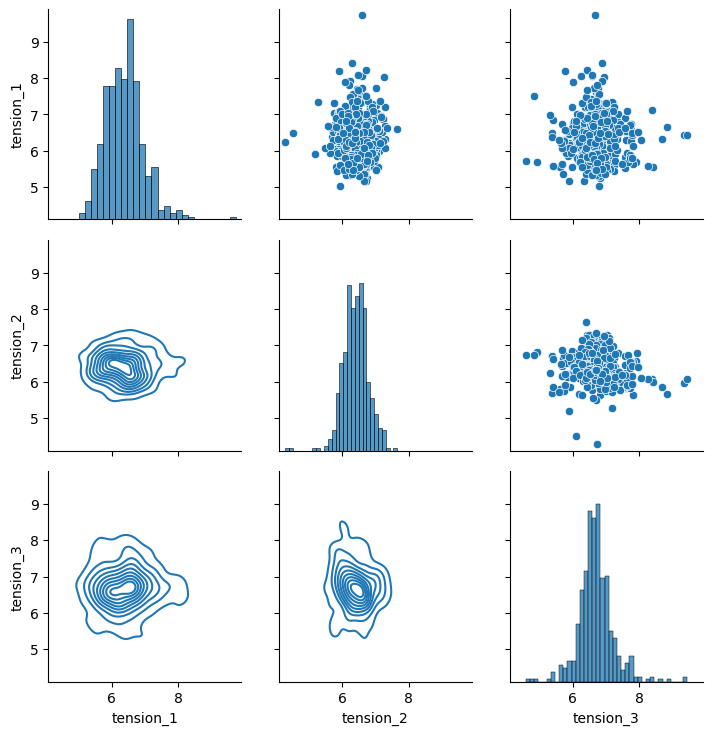

In [37]:
import seaborn as sns

layer = "U"
mask = new_df["layer"] == layer
mask = mask & ~np.isnan(new_df["tension_3"])
g = sns.PairGrid(new_df[mask], vars=["tension_1", "tension_2", "tension_3"])

g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

g.set(xlim=(4.1, 9.9), ylim=(4.1, 9.9))

new_df[mask].describe()


,headboard_num,dwa_channel,apa_channel,tension_1,tension_2,tension_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,0.0
mean,3.963636,3.272727,261.136364,6.300545,6.441024,NaN
std,3.898079,2.257040,158.274167,0.444307,0.580929,NaN
min,1.000000,0.000000,1.000000,5.275382,4.516839,NaN
25%,1.000000,1.000000,28.000000,6.033485,6.165402,NaN
50%,2.000000,3.000000,345.500000,6.262497,6.532764,NaN
75%,10.000000,5.000000,373.000000,6.511021,6.735722,NaN
max,10.000000,7.000000,400.000000,8.066000,9.481990,NaN


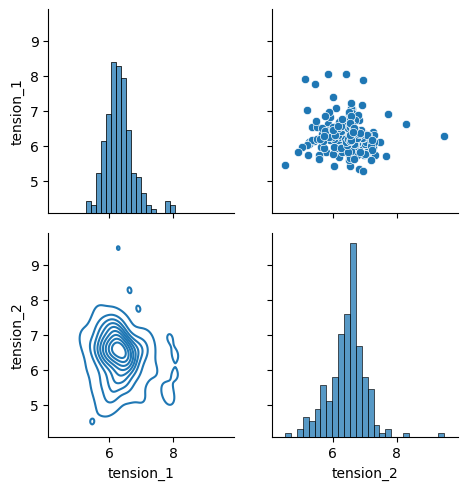

In [38]:
layer = "U"
mask = new_df["layer"] == layer
mask = mask & np.isnan(new_df["tension_3"])
g = sns.PairGrid(new_df[mask], vars=["tension_1", "tension_2"])

g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

g.set(xlim=(4.1, 9.9), ylim=(4.1, 9.9))

new_df[mask].describe()


,headboard_num,dwa_channel,apa_channel,tension_1,tension_2,tension_3
count,960.000000,960.000000,960.000000,960.000000,0.0,0.0
mean,5.500000,3.500000,240.500000,6.857583,NaN,NaN
std,2.873778,2.292482,138.635989,0.414117,NaN,NaN
min,1.000000,0.000000,1.000000,4.442193,NaN,NaN
25%,3.000000,1.750000,120.750000,6.642089,NaN,NaN
50%,5.500000,3.500000,240.500000,6.947997,NaN,NaN
75%,8.000000,5.250000,360.250000,7.136189,NaN,NaN
max,10.000000,7.000000,480.000000,8.154247,NaN,NaN


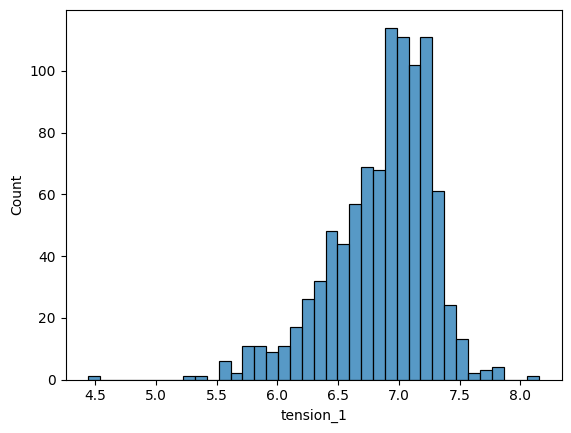

In [39]:
import seaborn as sns

layer = "X"
mask = new_df["layer"] == layer

# make a histogram just for tension_1
sns.histplot(new_df[mask]["tension_1"])

new_df[mask].describe()
